# Visual Evidence-Based Feature Engineering
Analyze the visual

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset_usa_modified.csv", encoding='utf-8')

## 1. Distribution & Outlier Analysis

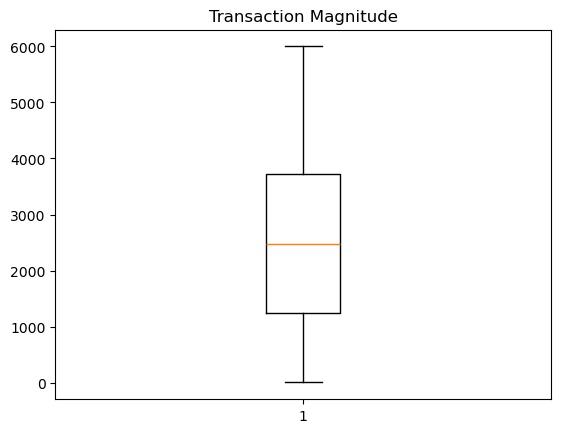

In [3]:
# BOX PLOT
plt.boxplot(df["Transaction_Amount"])
plt.title("Transaction Magnitude")
plt.show()

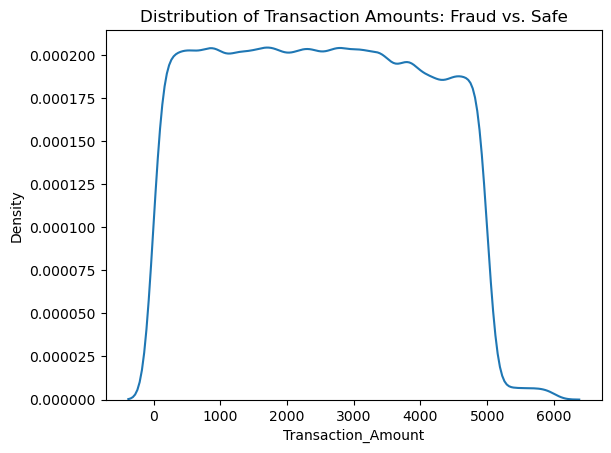

In [4]:
# KDE (Density)
sns.kdeplot(data=df, x="Transaction_Amount")
plt.title("Distribution of Transaction Amounts: Fraud vs. Safe")
plt.show()

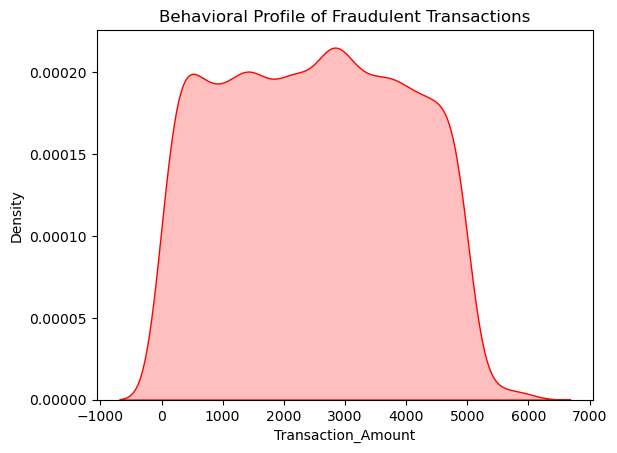

In [5]:
# Filter for just the fraud cases
fraud_only = df[df['Is_Fraud'] == 1]

sns.kdeplot(data=fraud_only, x='Transaction_Amount', fill=True, color='red')
plt.title('Behavioral Profile of Fraudulent Transactions')
plt.show()

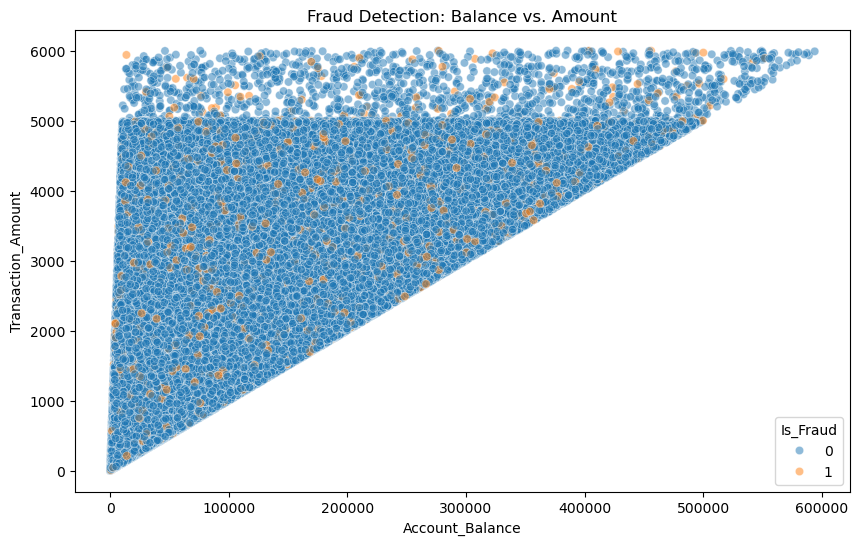

In [6]:
# Scatterplot: Balance over amount
plt.figure(figsize=(10, 6))
# Adding 'hue' will color the dots by fraud status
sns.scatterplot(data=df, x='Account_Balance', y='Transaction_Amount', hue='Is_Fraud', alpha=0.5)
plt.title('Fraud Detection: Balance vs. Amount')
plt.show()

## 2. Categorical "Hotspots"

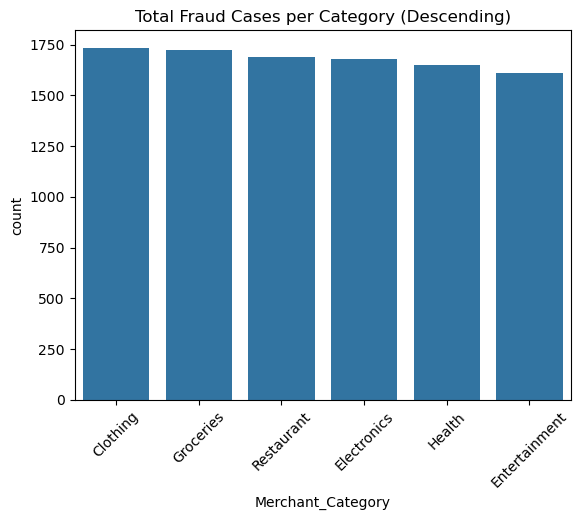

In [7]:
# Top merchants with large no cases of fraud
fraud_merchant = df[df['Is_Fraud'] == 1]
desc_order = fraud_merchant['Merchant_Category'].value_counts().index
sns.countplot(data=fraud_merchant, x="Merchant_Category", order=desc_order)

plt.title("Total Fraud Cases per Category (Descending)")
plt.xticks(rotation=45)
plt.show()

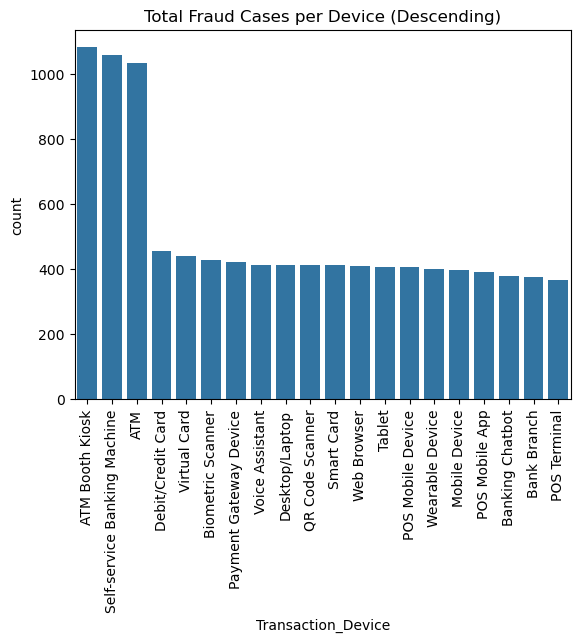

In [8]:
# Device Type & Transaction Device: Does fraud happen more on "Mobile" vs. "Desktop"?
fraud_device = df[df['Is_Fraud'] == 1]
desc_order = fraud_device['Transaction_Device'].value_counts().index
sns.countplot(data=fraud_device, x="Transaction_Device", order=desc_order)

plt.title("Total Fraud Cases per Device (Descending)")
plt.xticks(rotation=90)
plt.show()

## 3. Temporal (Time-Based) Patterns

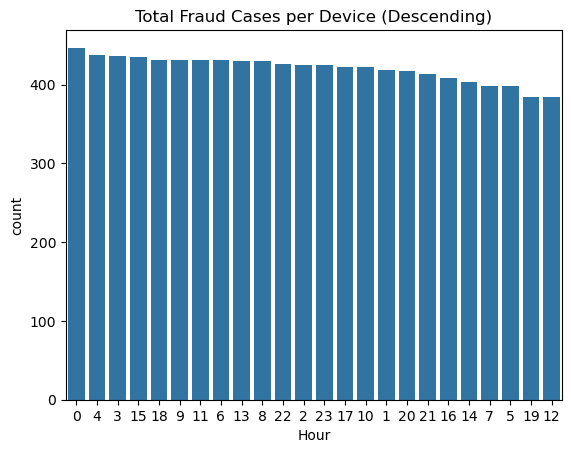

In [9]:
df['Hour'] = pd.to_datetime(df['Transaction_Time'], format='%H:%M:%S').dt.hour

fraud_time = df[df['Is_Fraud']==1]
desc_order = fraud_time['Hour'].value_counts().index
sns.countplot(data=df[df['Is_Fraud'] == 1], x="Hour", order=desc_order)

plt.title("Total Fraud Cases per Device (Descending)")
plt.show()

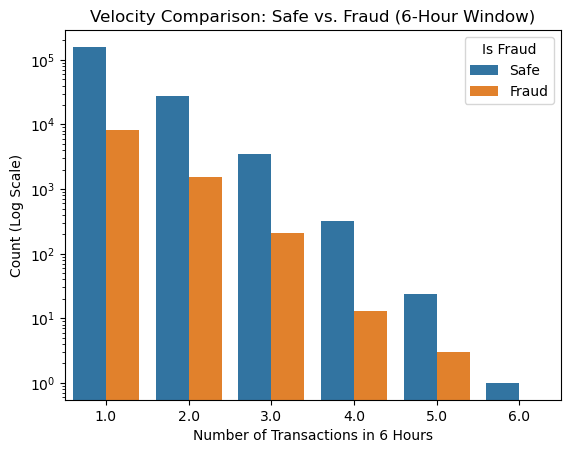

In [15]:
# 1. Clean the index and prepare Timestamps
df = df.reset_index(drop=True)

# Added 'dayfirst=True' to handle the DD-MM-YYYY format correctly
df['Full_Timestamp'] = pd.to_datetime(
    df['Transaction_Date'] + ' ' + df['Transaction_Time'], 
    dayfirst=True
)

# 1. Update the calculation to 6 hours
df['Tx_Velocity_6h'] = (
    df.groupby('Customer_ID')
      .rolling(window='6h', on='Full_Timestamp')['Transaction_ID']
      .count()
      .values
)

ax = sns.countplot(data=df, x='Tx_Velocity_6h', hue='Is_Fraud')
# Using a log scale makes the small number of fraud cases visible
ax.set_yscale("log")

plt.title('Velocity Comparison: Safe vs. Fraud (6-Hour Window)')
plt.xlabel('Number of Transactions in 6 Hours')
plt.ylabel('Count (Log Scale)')
plt.legend(title='Is Fraud', labels=['Safe', 'Fraud'])
plt.show()

## 4. Geographical & Logical Scope

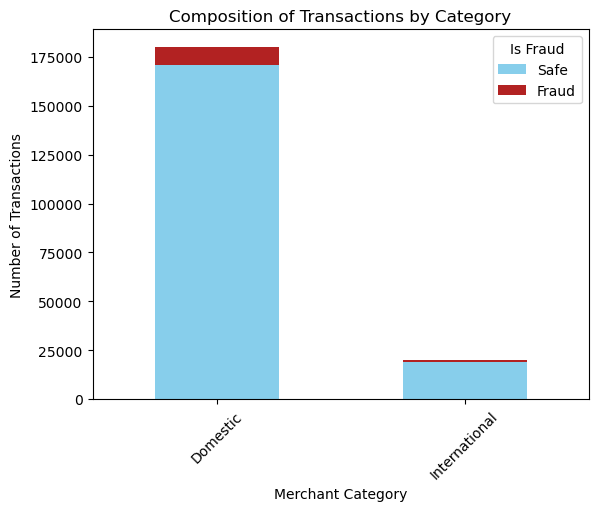

In [16]:
# Scope vs. Fraud: Is International scope a strong indicator of risk?
stacked_data = df.groupby(['Transaction_Scope', 'Is_Fraud']).size().unstack()

stacked_data.plot(kind="bar", stacked=True, color=['skyblue', 'firebrick'])
plt.title('Composition of Transactions by Category')
plt.ylabel('Number of Transactions')
plt.xlabel('Merchant Category')
plt.legend(title='Is Fraud', labels=['Safe', 'Fraud'])
plt.xticks(rotation=45)
plt.show()

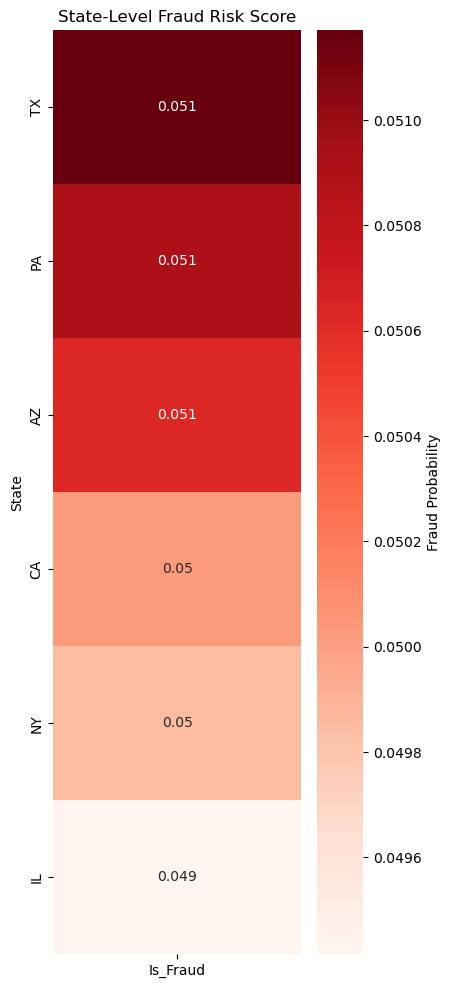

In [17]:
# State-Level Risk Map: Are certain states "hubs" for fraudulent activity?
# 1. Calculate average fraud rate per state and sort it
state_risk = df.groupby('State')[['Is_Fraud']].mean().sort_values(by='Is_Fraud', ascending=False)

# 2. Plot as a single-column heatmap
plt.figure(figsize=(4, 12))
sns.heatmap(state_risk, annot=True, cmap="Reds", cbar_kws={'label': 'Fraud Probability'})

plt.title("State-Level Fraud Risk Score")
plt.show()

## 5. Feature Correlation

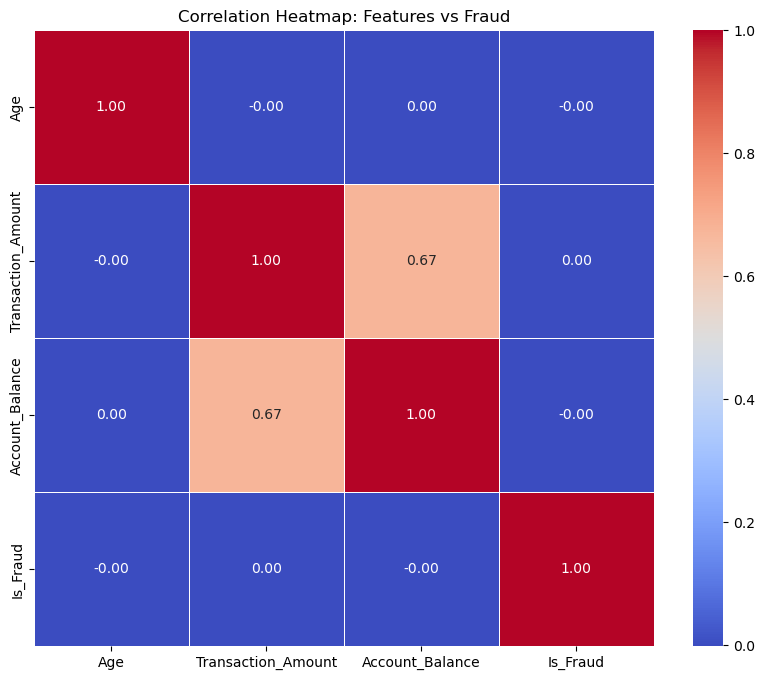

In [18]:
# 1. Select only the numerical features you want to compare
features = ['Age', 'Transaction_Amount', 'Account_Balance', 'Is_Fraud']
corr_matrix = df[features].corr()

# 2. Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap: Features vs Fraud')
plt.show()